# Extraa Learn Project Statement (Given question)

## Context




The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective





ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description



The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

# Understanding the given problem and expectations:



1. Requires me to identify which leads are more likely to convert into paid customers
2. Requires me to understand key factors that influence the conversion and build user profiles according to the potential of conversion for each group.

In order to achieve these above goals, I am targetting the variable status as the dependent variable, as I am trying to predict the status of each individual based on the different features of that individual.

I will be using performance metrics in order to see how my data analysis and model performance is, and also explain the significance of the results given by these performance metrics. The few performance metrics I will be using includes Precision, Recall, and F1 Score, along with AUC-ROC curve for model performance evaluation.

# Coding for analysis:

## Importing necessary libraries and data

In [36]:
# Importing the basic libraries we will require for the project

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
#from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
#from sklearn.impute import SimpleImputer

# To get diferent metric scores
#from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

## Data Overview

- Observations
- Sanity checks

#### Load dataset

In [37]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd

#File location and reading data file
file_path = '/content/drive/My Drive/ExtraaLearn.csv'
df = pd.read_csv(file_path)

# Previewing the data
print(df.head())


       ID  age current_occupation first_interaction profile_completed  \
0  EXT001   57         Unemployed           Website              High   
1  EXT002   56       Professional        Mobile App            Medium   
2  EXT003   52       Professional           Website            Medium   
3  EXT004   53         Unemployed           Website              High   
4  EXT005   23            Student           Website              High   

   website_visits  time_spent_on_website  page_views_per_visit  \
0               7                   1639                 1.861   
1               2                     83                 0.320   
2               3                    330                 0.074   
3               4                    464                 2.057   
4               4                    600                16.914   

      last_activity print_media_type1 print_media_type2 digital_media  \
0  Website Activity               Yes                No           Yes   
1  Website Activit

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### Checking the data first


In [39]:
# General information about the dataset
df.info()

# Summary statistics for numerical columns
df.describe()

# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

According to the code above, there are no missing values for the data given above. Since there are no missing values, I am now going to check for outliers.

#### Feature Engineering

In [40]:
# Checking the top 10 data rows
df.head(10)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
5,EXT006,50,Unemployed,Mobile App,High,4,212,5.682,Phone Activity,No,No,No,Yes,No,0
6,EXT007,56,Professional,Mobile App,Medium,13,625,2.015,Website Activity,No,No,Yes,No,No,1
7,EXT008,57,Professional,Mobile App,Medium,2,517,2.985,Email Activity,No,No,No,No,No,0
8,EXT009,57,Professional,Mobile App,High,2,2231,2.194,Phone Activity,No,No,Yes,No,No,1
9,EXT010,59,Professional,Mobile App,High,1,1819,3.513,Phone Activity,No,No,No,No,No,0


In [41]:
# Changing media types into numerical categories
df['print_media_type1'] = df['print_media_type1'].map({'No': 0, 'Yes': 1})
df['print_media_type2'] = df['print_media_type2'].map({'No': 0, 'Yes': 1})
df['digital_media'] = df['digital_media'].map({'No': 0, 'Yes': 1})

In [42]:
# Creating new variable total_media_interaction for media by adding each binary variable
df['total_media_interaction'] = (
    df['print_media_type1'] + df['print_media_type2'] + df['digital_media'])

# Creating new categorical variable, profile_completed_numeric as profile_completed categorized by numerical categories
df['profile_completed_numeric'] = df['profile_completed'].map({'Low': 0, 'Medium': 1, 'High': 2})



In [43]:
# Creating new categorical variable, occupation_numeric as current_occupation categorized by numerical categories
df['occupation_numeric'] = df['current_occupation'].map({'Unemployed': 0, 'Student': 1, 'Professional': 2})

# Creating new categorical variable, activity_numeric as last_activity categorized by numerical categories
df['activity_numeric'] = df['last_activity'].map({'Phone Activity': 0, 'Email Activity': 1, 'Website Activity': 2})

In [44]:
# Creating new categorical variable, f_interaction_numeric as first_interaction categorized by numerical categories
df['f_interaction_numeric'] = df['first_interaction'].map({'Mobile App': 0, 'Website': 1})

In [45]:
# Creating new categorical variable, channels_numeric as educational channels categorized by binary categories
df['channels_numeric'] = df['educational_channels'].map({'No': 0, 'Yes': 1})

# Creating new categorical variable, referral_numeric as referral categorized by binary categories
df['referral_numeric'] = df['referral'].map({'No': 0, 'Yes': 1})

In [46]:
#Looking at the data after change
df.head(5)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,...,educational_channels,referral,status,total_media_interaction,profile_completed_numeric,occupation_numeric,activity_numeric,f_interaction_numeric,channels_numeric,referral_numeric
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,1,...,No,No,1,2,2,0,2,1,0,0
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,0,...,Yes,No,0,0,1,2,2,0,1,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,0,...,No,No,0,1,1,2,2,1,0,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,0,...,No,No,1,0,2,0,2,1,0,0
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,0,...,No,No,0,0,2,1,1,1,0,0


In [47]:
# Dropping all the categorical variables that have been changed into numeric categories

df.drop(columns=['ID', 'current_occupation', 'first_interaction', 'profile_completed', 'last_activity','educational_channels', 'referral' ], inplace=True)


In [48]:
# Checking the data after dropping some columns
df.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,status,total_media_interaction,profile_completed_numeric,occupation_numeric,activity_numeric,f_interaction_numeric,channels_numeric,referral_numeric
0,57,7,1639,1.861,1,0,1,1,2,2,0,2,1,0,0
1,56,2,83,0.320,0,0,0,0,0,1,2,2,0,1,0
2,52,3,330,0.074,0,0,1,0,1,1,2,2,1,0,0
3,53,4,464,2.057,0,0,0,1,0,2,0,2,1,0,0
4,23,4,600,16.914,0,0,0,0,0,2,1,1,1,0,0


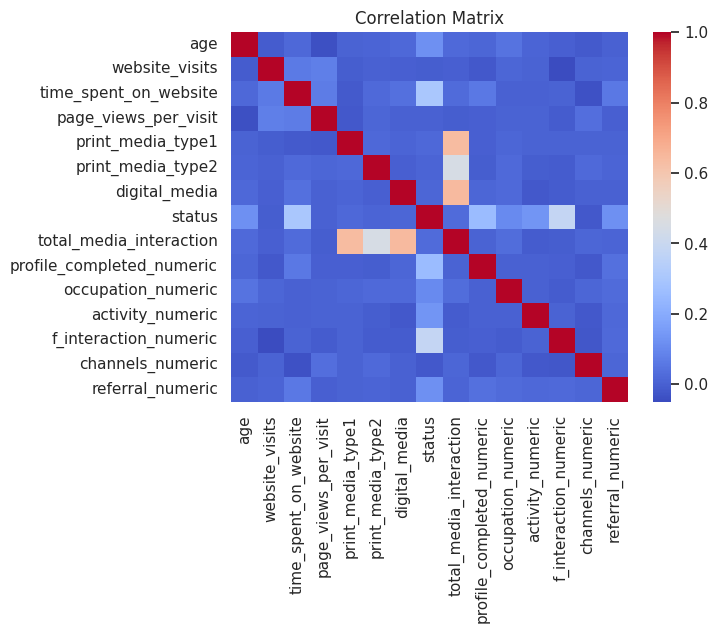

In [49]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Since this correlation matrix is too vague to figure anything as of now, I will leave it at this and decide after exploratory data analysis to see which features are relevant when checking for its relationship with our target variable, status.

#### Outlier Detection

I am separating the columns with continuous values as the num_cols with the columns containing discrete numerical categories as the encoded_cols

##### For continuous values:

In [50]:
# Detecting outliers using the IQR method
num_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']  # Numerical columns

for col in num_cols:
    # First quartile
    Q1 = df[col].quantile(0.25)
    # Third quartile
    Q3 = df[col].quantile(0.75)
    # Interquartile range
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in '{col}': {len(outliers)}")


Outliers in 'age': 0
Outliers in 'website_visits': 154
Outliers in 'time_spent_on_website': 0
Outliers in 'page_views_per_visit': 257


In the above program, outliers are determined as outliers based on whether the data point is either above the upper bound or lower than the lower bound. The lower bound is calculated by subtracting the multiple of 1.5 with the Inter Quartile Range (third quartile-first quartile) by first quartile. The upper bound is calculated by adding the multiple of 1.5 with the Inter Quartile Range (third quartile-first quartile) with third quartile.

As seen, website visits has 154 outliers and page views per visit has 257 outliers.

##### For numerical categories:

In [51]:
encoded_cols = ['profile_completed_numeric', 'f_interaction_numeric', 'occupation_numeric', 'print_media_type1', 'print_media_type2', 'digital_media', 'channels_numeric', 'referral_numeric']

for col in encoded_cols:
    counts = df[col].value_counts()
    print(f"Counts for '{col}':\n{counts}\n")


Counts for 'profile_completed_numeric':
profile_completed_numeric
2    2264
1    2241
0     107
Name: count, dtype: int64

Counts for 'f_interaction_numeric':
f_interaction_numeric
1    2542
0    2070
Name: count, dtype: int64

Counts for 'occupation_numeric':
occupation_numeric
2    2616
0    1441
1     555
Name: count, dtype: int64

Counts for 'print_media_type1':
print_media_type1
0    4115
1     497
Name: count, dtype: int64

Counts for 'print_media_type2':
print_media_type2
0    4379
1     233
Name: count, dtype: int64

Counts for 'digital_media':
digital_media
0    4085
1     527
Name: count, dtype: int64

Counts for 'channels_numeric':
channels_numeric
0    3907
1     705
Name: count, dtype: int64

Counts for 'referral_numeric':
referral_numeric
0    4519
1      93
Name: count, dtype: int64



In [52]:
# Identify invalid values outside the valid range
invalid_values1 = df[~df['profile_completed_numeric'].isin([0, 1, 2])]
print("Invalid values in 'profile_completed_numeric':\n", invalid_values1)
invalid_values2 = df[~df['f_interaction_numeric'].isin([0, 1, 2])]
print("Invalid values in 'f_interaction_numeric':\n", invalid_values2)
invalid_values3 = df[~df['print_media_type1'].isin([0, 1])]
print("Invalid values in 'print_media_type1':\n", invalid_values3)
invalid_values4 = df[~df['print_media_type2'].isin([0, 1])]
print("Invalid values in 'print_media_type2':\n", invalid_values4)
invalid_values5 = df[~df['digital_media'].isin([0, 1])]
print("Invalid values in 'digital_media':\n", invalid_values5)
invalid_values6 = df[~df['channels_numeric'].isin([0, 1])]
print("Invalid values in 'channels_numeric':\n", invalid_values6)
invalid_values7 = df[~df['referral_numeric'].isin([0, 1])]
print("Invalid values in 'referral_numeric':\n", invalid_values7)
invalid_values8 = df[~df['occupation_numeric'].isin([0, 1, 2])]
print("Invalid values in 'occupation_numeric':\n", invalid_values8)


Invalid values in 'profile_completed_numeric':
 Empty DataFrame
Columns: [age, website_visits, time_spent_on_website, page_views_per_visit, print_media_type1, print_media_type2, digital_media, status, total_media_interaction, profile_completed_numeric, occupation_numeric, activity_numeric, f_interaction_numeric, channels_numeric, referral_numeric]
Index: []
Invalid values in 'f_interaction_numeric':
 Empty DataFrame
Columns: [age, website_visits, time_spent_on_website, page_views_per_visit, print_media_type1, print_media_type2, digital_media, status, total_media_interaction, profile_completed_numeric, occupation_numeric, activity_numeric, f_interaction_numeric, channels_numeric, referral_numeric]
Index: []
Invalid values in 'print_media_type1':
 Empty DataFrame
Columns: [age, website_visits, time_spent_on_website, page_views_per_visit, print_media_type1, print_media_type2, digital_media, status, total_media_interaction, profile_completed_numeric, occupation_numeric, activity_numeric, f

As we can see above, there are no outliers for the categorical variables.

##### Outlier Treatment

I have chosen to cap the values of the outliers in the two columns in which we detected some outliers. I am limiting the outliers to be either lower bound or upper bound based on whichever point is nearest to them.

In [53]:
for col in ['website_visits', 'page_views_per_visit']:

    # Capping outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


In [54]:
# Detecting outliers using the IQR method again
num_cols = ['website_visits', 'page_views_per_visit']

for col in num_cols:

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in '{col}': {len(outliers)}")

Outliers in 'website_visits': 615
Outliers in 'page_views_per_visit': 0


In [20]:
# Detecting outliers using the IQR method for 'website_visits'
Q1_website = df['website_visits'].quantile(0.25)
Q3_website = df['website_visits'].quantile(0.75)
IQR_website = Q3_website - Q1_website

lower_bound_website = Q1_website - 1.5 * IQR_website
upper_bound_website = Q3_website + 1.5 * IQR_website

# Capping outliers for 'website_visits'
df['website_visits'] = np.where(df['website_visits'] < lower_bound_website, lower_bound_website, df['website_visits'])
df['website_visits'] = np.where(df['website_visits'] > upper_bound_website, upper_bound_website, df['website_visits'])

outliers_website = df[(df['website_visits'] < lower_bound_website) | (df['website_visits'] > upper_bound_website)]
print(f"Outliers in 'website_visits': {len(outliers_website)}")

Outliers in 'website_visits': 0


In [55]:
# Detecting outliers using the IQR method for 'page_views_per_visit'
Q1_page_views = df['page_views_per_visit'].quantile(0.25)
Q3_page_views = df['page_views_per_visit'].quantile(0.75)
IQR_page_views = Q3_page_views - Q1_page_views

lower_bound_page_views = Q1_page_views - 1.5 * IQR_page_views
upper_bound_page_views = Q3_page_views + 1.5 * IQR_page_views

# Capping outliers for 'page_views_per_visit'
df['page_views_per_visit'] = np.where(df['page_views_per_visit'] < lower_bound_page_views, lower_bound_page_views, df['page_views_per_visit'])
df['page_views_per_visit'] = np.where(df['page_views_per_visit'] > upper_bound_page_views, upper_bound_page_views, df['page_views_per_visit'])

outliers_page_views = df[(df['page_views_per_visit'] < lower_bound_page_views) | (df['page_views_per_visit'] > upper_bound_page_views)]
print(f"Outliers in 'page_views_per_visit': {len(outliers_page_views)}")

Outliers in 'page_views_per_visit': 0


## EDA

- It is a good idea to explore the data once again after manipulating it.

### Checking the distributions of different variables:

#### Univariate Analysis

##### Numerical Features

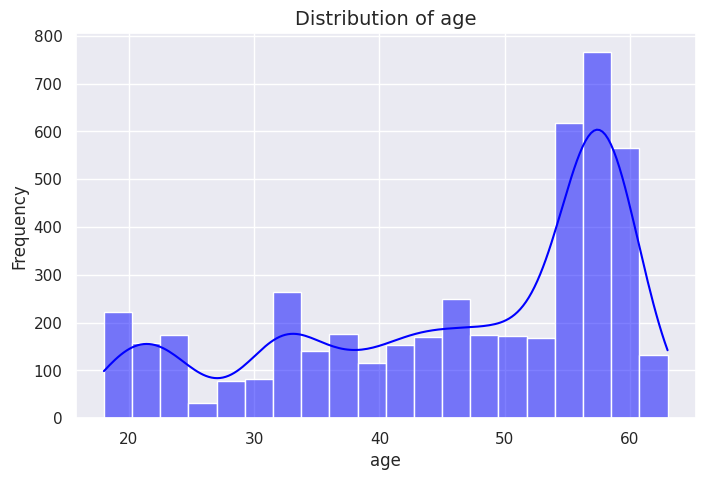

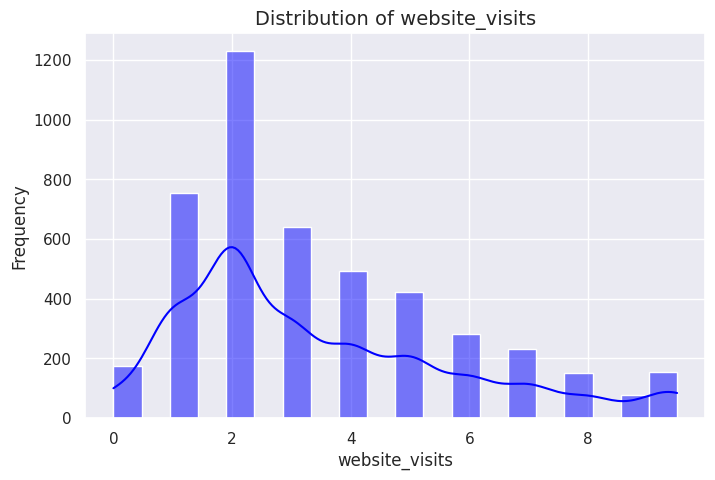

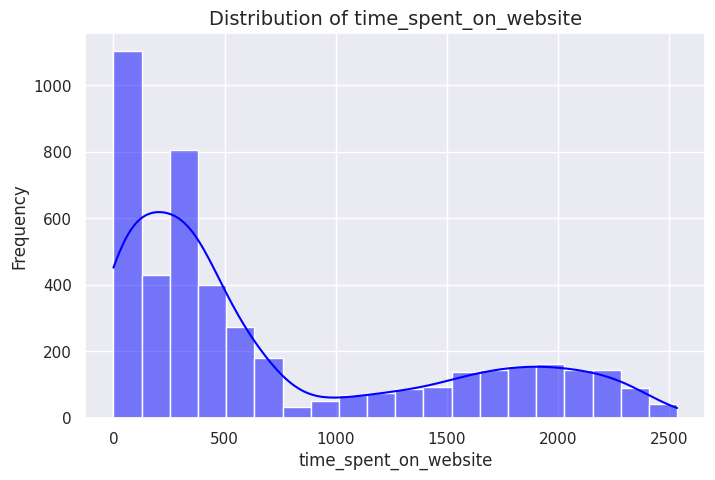

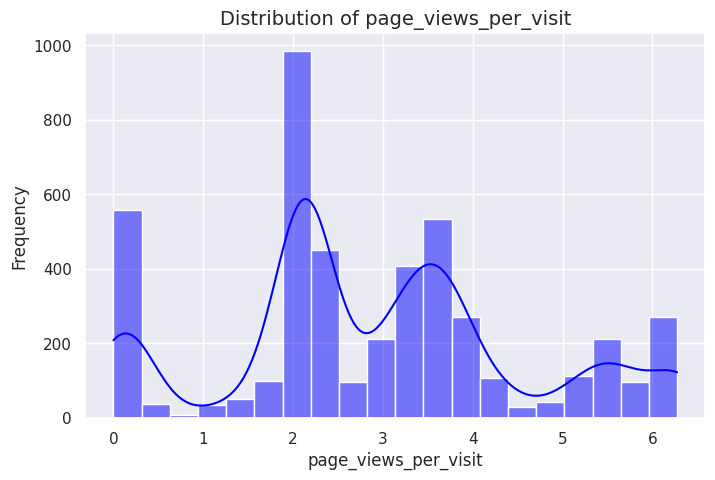

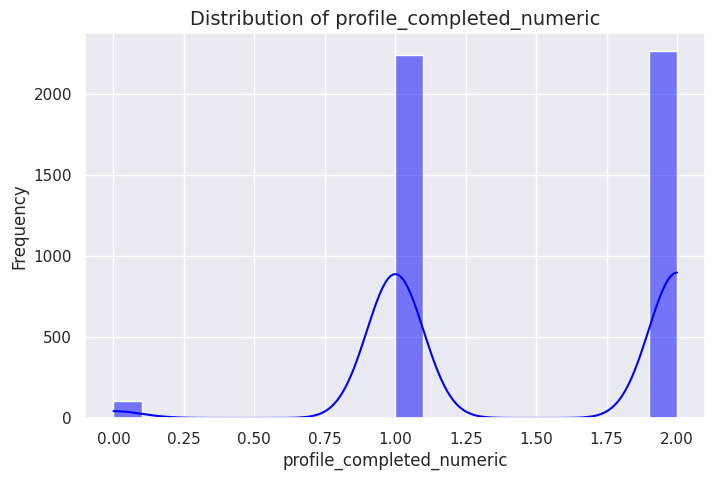

In [56]:
numerical_features = ['age', 'website_visits', 'time_spent_on_website',
                      'page_views_per_visit', 'profile_completed_numeric']

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()



Interpreting the plots
As we can see in the above plots, the following are the interpretations for each of the plots:
1. Age: The distribution of age is skewed towards the right with the most numbe of observations belonging to the age group of 50-60.
2. Website Visits: The distribution of website visits is skewed to the left as most of the observations in this data visit the website from 1-3 times.
3. Time spent on the website: The distribution of the time spent on website is left-skewed as well, with maxmimum number of observations spending 0-300 seconds on the website.
4. Page Views per visit: The distribution for page visits per website visit seems to be slightly normal in distribution compared to all other variables we have looked at so far.
5. Profile Completed Numeric: The distribution for profile completed seems to be skewed right as most of the observations have filled in their profile in either medium or a high level where the frequency for medium and high is almost the same.

The exact number of frequencies for each value is calculated below:


In [57]:
# Calculate frequencies for numerical features
numerical_features = ['age', 'website_visits', 'time_spent_on_website',
                      'page_views_per_visit', 'profile_completed_numeric']
print("Frequencies for Numerical Features:\n")

for feature in numerical_features:
    freq = df[feature].value_counts().sort_index()  # Sort values by index for numerical features
    print(f"Feature: {feature}")
    print(freq)
    print("\n")


Frequencies for Numerical Features:

Feature: age
age
18     66
19     81
20     75
21     86
22     71
23     85
24     90
25     17
26     15
27     14
28     27
29     36
30     44
31     38
32    188
33     76
34     74
35     66
36     58
37     60
38     58
39     52
40     63
41     70
42     83
43     89
44     81
45     84
46     85
47     80
48     88
49     87
50     85
51     88
52     77
53     91
54     88
55    200
56    330
57    385
58    382
59    328
60    238
61     38
62     48
63     47
Name: count, dtype: int64


Feature: website_visits
website_visits
0.0     174
1.0     755
2.0    1229
3.0     641
4.0     494
5.0     422
6.0     282
7.0     232
8.0     151
9.0      78
9.5     154
Name: count, dtype: int64


Feature: time_spent_on_website
time_spent_on_website
0       174
1        71
2         3
3         2
4         7
       ... 
2509      1
2522      1
2529      1
2531      1
2537      1
Name: count, Length: 1623, dtype: int64


Feature: page_views_per_visit
pa

##### Categorical features

<ipython-input-58-fd492bc78374>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="muted")


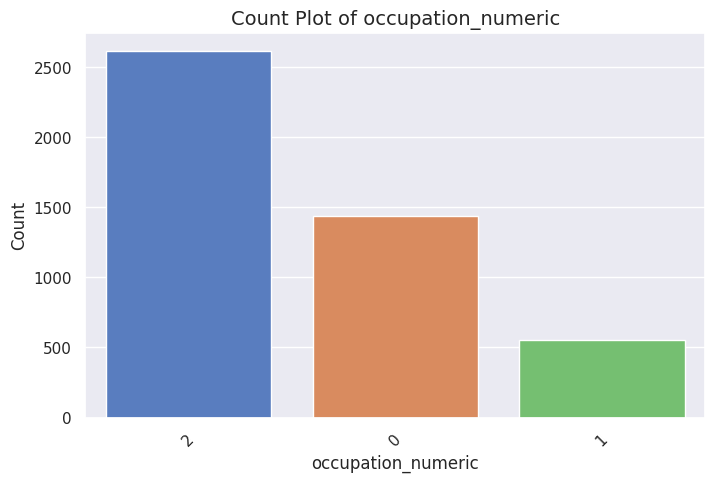

<ipython-input-58-fd492bc78374>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="muted")


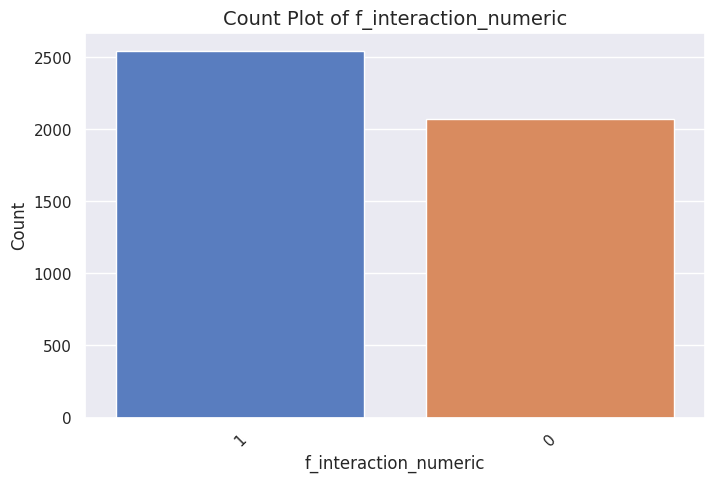

<ipython-input-58-fd492bc78374>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="muted")


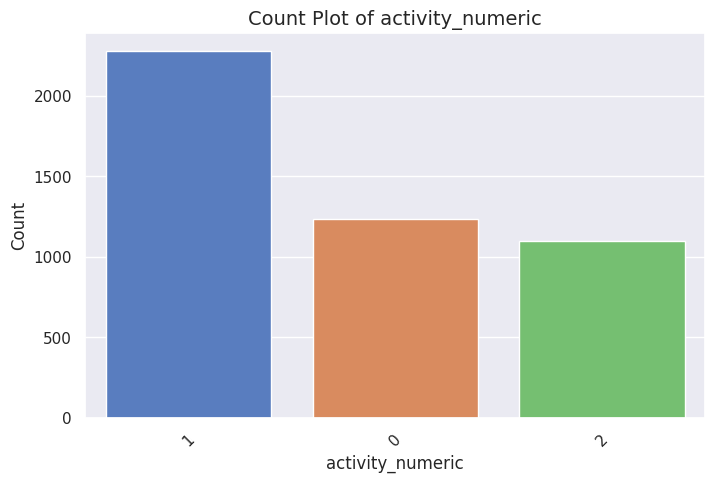

<ipython-input-58-fd492bc78374>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="muted")


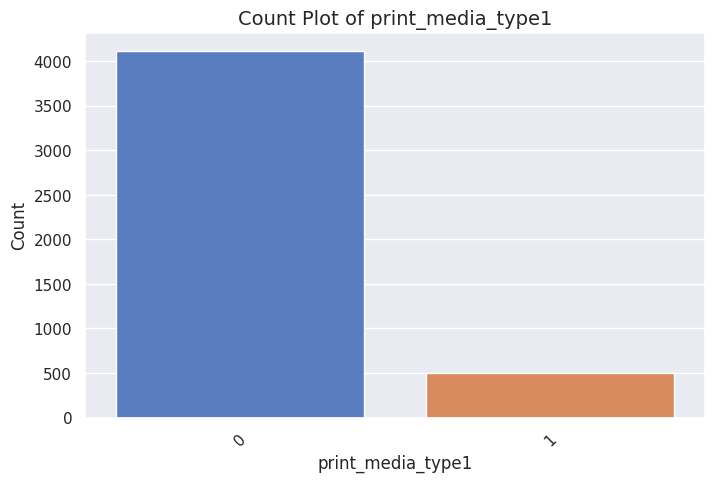

<ipython-input-58-fd492bc78374>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="muted")


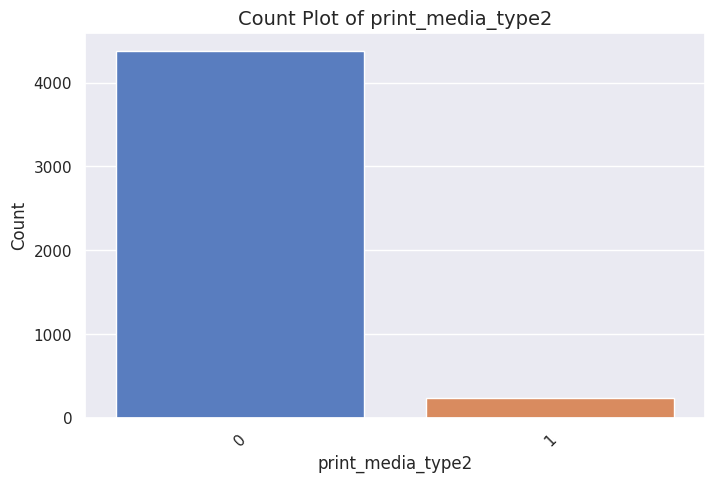

<ipython-input-58-fd492bc78374>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="muted")


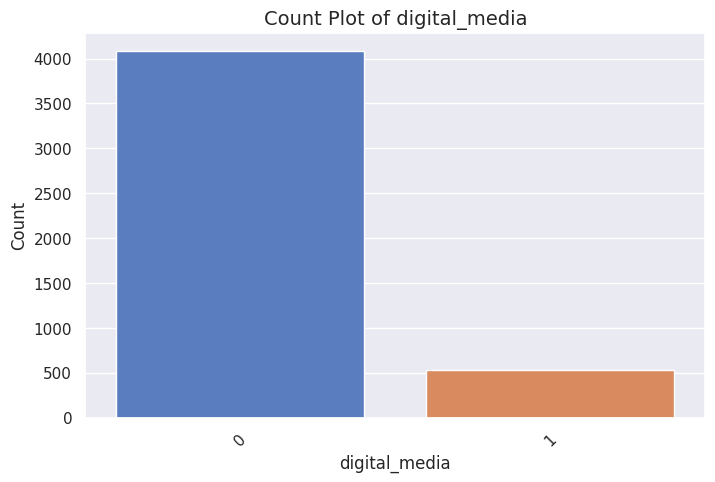

<ipython-input-58-fd492bc78374>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="muted")


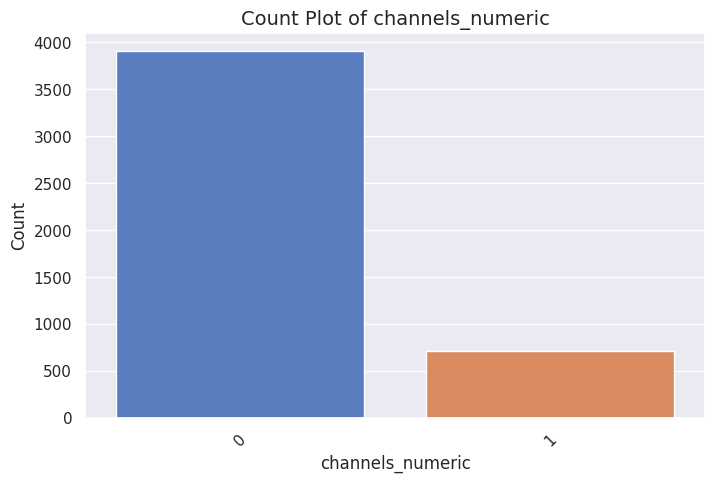

<ipython-input-58-fd492bc78374>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="muted")


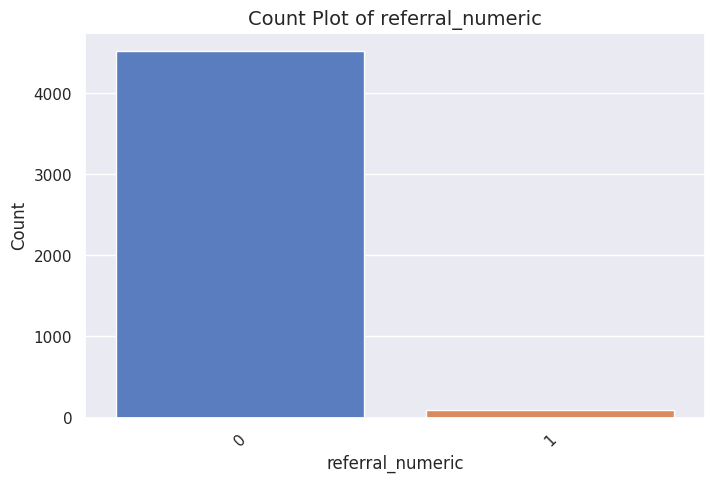

In [58]:
# Categorical features to analyze
categorical_features = ['occupation_numeric', 'f_interaction_numeric',
                        'activity_numeric', 'print_media_type1', 'print_media_type2',
                        'digital_media', 'channels_numeric', 'referral_numeric']

# Plot count plots
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="muted")
    plt.title(f'Count Plot of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()


Interpretation of the plots of distribution for each Each plot above is interpreted below:

1. Occupation Numeric: The distribution in this variable is skewed left as most of the people observed in the dataset are unemployed (0), then a little fewer are student (1), and the least number of them is professional (2).
2. First Interaction: The distribution indicates that there is higher number of observations that first interacted with this platform through Mobile app (1) than website (0).
3. Activity Numeric: As shown in the plot, most of the people in the dataset last interacted with the platform through phone (0), then through emails (1), and then through live chat on the website (2). While the distribution for the people interacting through phone is the largest, the number of people interacting through email and website are pretty similar.
4. Print Media Type 1 and 2: The distribution for both magazine and newspaper shows that most of the observations have not seen the ad for this platform on either of news paper or magazine (0), and only a few of them have seen it in the ad of either of them (1).
5. Digital Media: The distribution in this variable shows that most of the observations had not heard about the platform in other digital media while a few of them had heard about this platform on other media.
6. Channels Numeric: Most of the observations given had not heard about the platform from educational channels (0), but a few of them had heard about the platform in educational channels (1).
7. Referral Numeric: Most of the observations given are people that have not been referred by anyone (0), and only a few of the observations have been referred to the platform. (1)

In [59]:
# Calculate frequencies for categorical features
categorical_features = ['occupation_numeric', 'f_interaction_numeric',
                        'activity_numeric', 'print_media_type1', 'print_media_type2',
                        'digital_media', 'channels_numeric', 'referral_numeric']

print("Frequencies for Categorical Features:\n")
for feature in categorical_features:
    freq = df[feature].value_counts()  # Sort by count for categorical features
    print(f"Feature: {feature}")
    print(freq)
    print("\n")


Frequencies for Categorical Features:

Feature: occupation_numeric
occupation_numeric
2    2616
0    1441
1     555
Name: count, dtype: int64


Feature: f_interaction_numeric
f_interaction_numeric
1    2542
0    2070
Name: count, dtype: int64


Feature: activity_numeric
activity_numeric
1    2278
0    1234
2    1100
Name: count, dtype: int64


Feature: print_media_type1
print_media_type1
0    4115
1     497
Name: count, dtype: int64


Feature: print_media_type2
print_media_type2
0    4379
1     233
Name: count, dtype: int64


Feature: digital_media
digital_media
0    4085
1     527
Name: count, dtype: int64


Feature: channels_numeric
channels_numeric
0    3907
1     705
Name: count, dtype: int64


Feature: referral_numeric
referral_numeric
0    4519
1      93
Name: count, dtype: int64




##### Target Variable Distribution

<ipython-input-60-ae0e9c2f4e09>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='status', order=df['status'].value_counts().index, palette="muted")


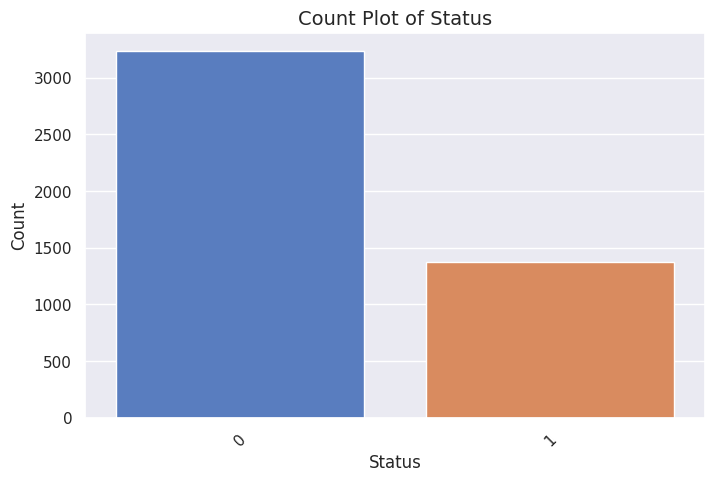

In [60]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='status', order=df['status'].value_counts().index, palette="muted")
plt.title('Count Plot of Status', fontsize=14)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

As seen in the plot above, most of the leads have not converted into paying customers (0) while less than half have turned into customers.

#### Bivariate Analysis where the dependent variable is Status

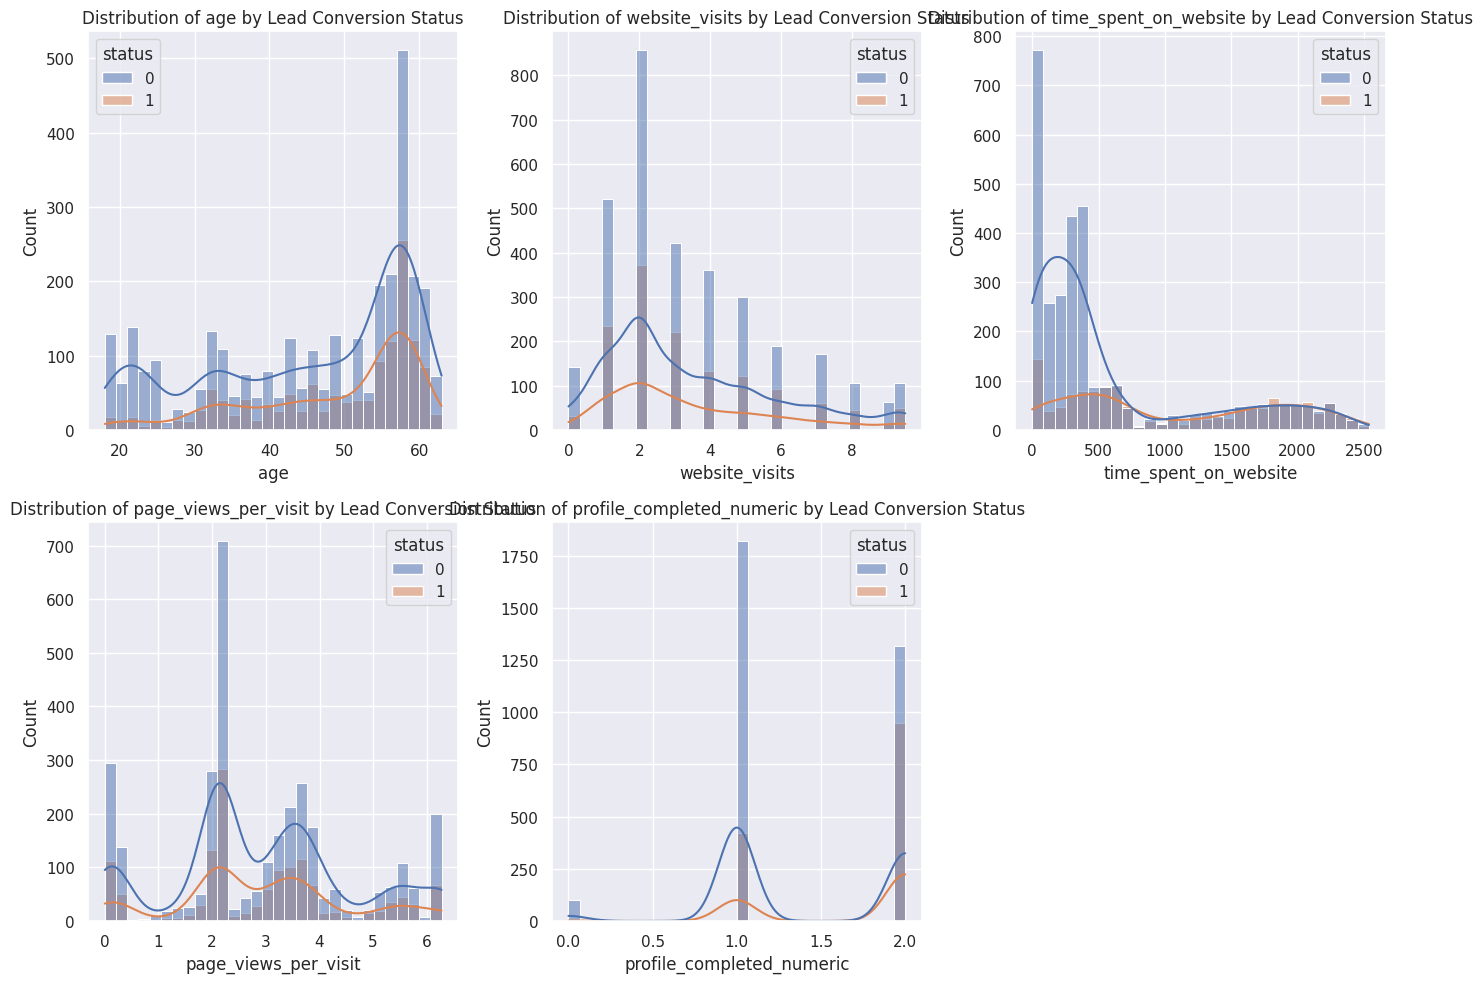

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features to plot
numerical_features = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'profile_completed_numeric']

# Set the figure size for the plots
plt.figure(figsize=(14, 10))

# Create subplots for each feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=feature, hue='status', kde=True, bins=30)
    plt.title(f'Distribution of {feature} by Lead Conversion Status')

plt.tight_layout()
plt.show()


##### Interpretation

1. Distribution of Age by Lead Conversion Status
   - Older age groups, particularly 50-60, are more likely to convert, suggesting that ExtraaLearn may appeal more to professionals or individuals with more experience.

2. Distribution of Website Visits by Lead Conversion Status**
   - A lower frequency of website visits correlates with higher conversion, indicating that more engaged leads (frequent visitors) may not always be the most likely to convert.

3. Distribution of Time Spent on Website by Lead Conversion Status
   - Time spent on the website is a good indicator of conversion likelihood, as more engaged leads tend to convert.

4. Distribution of Page Views per Visit by Lead Conversion Status
   - Fewer pages per visit might indicate focused interest, while multiple page views could suggest uncertainty or lack of commitment.

5. Distribution of Profile Completed Numeric by Lead Conversion Status
   - Profile completion is a strong predictor of conversion; users who fill out their profiles more thoroughly are more likely to convert.


- More engagement of leads (website visits, time spent, and profile completion) is strongly correlated with conversion.
- More engaged leads (with higher profile completion and more time spent on the website) are more likely to convert.
- The data suggests that older leads (50-60) are more likely to convert, which could indicate a professional or serious audience.

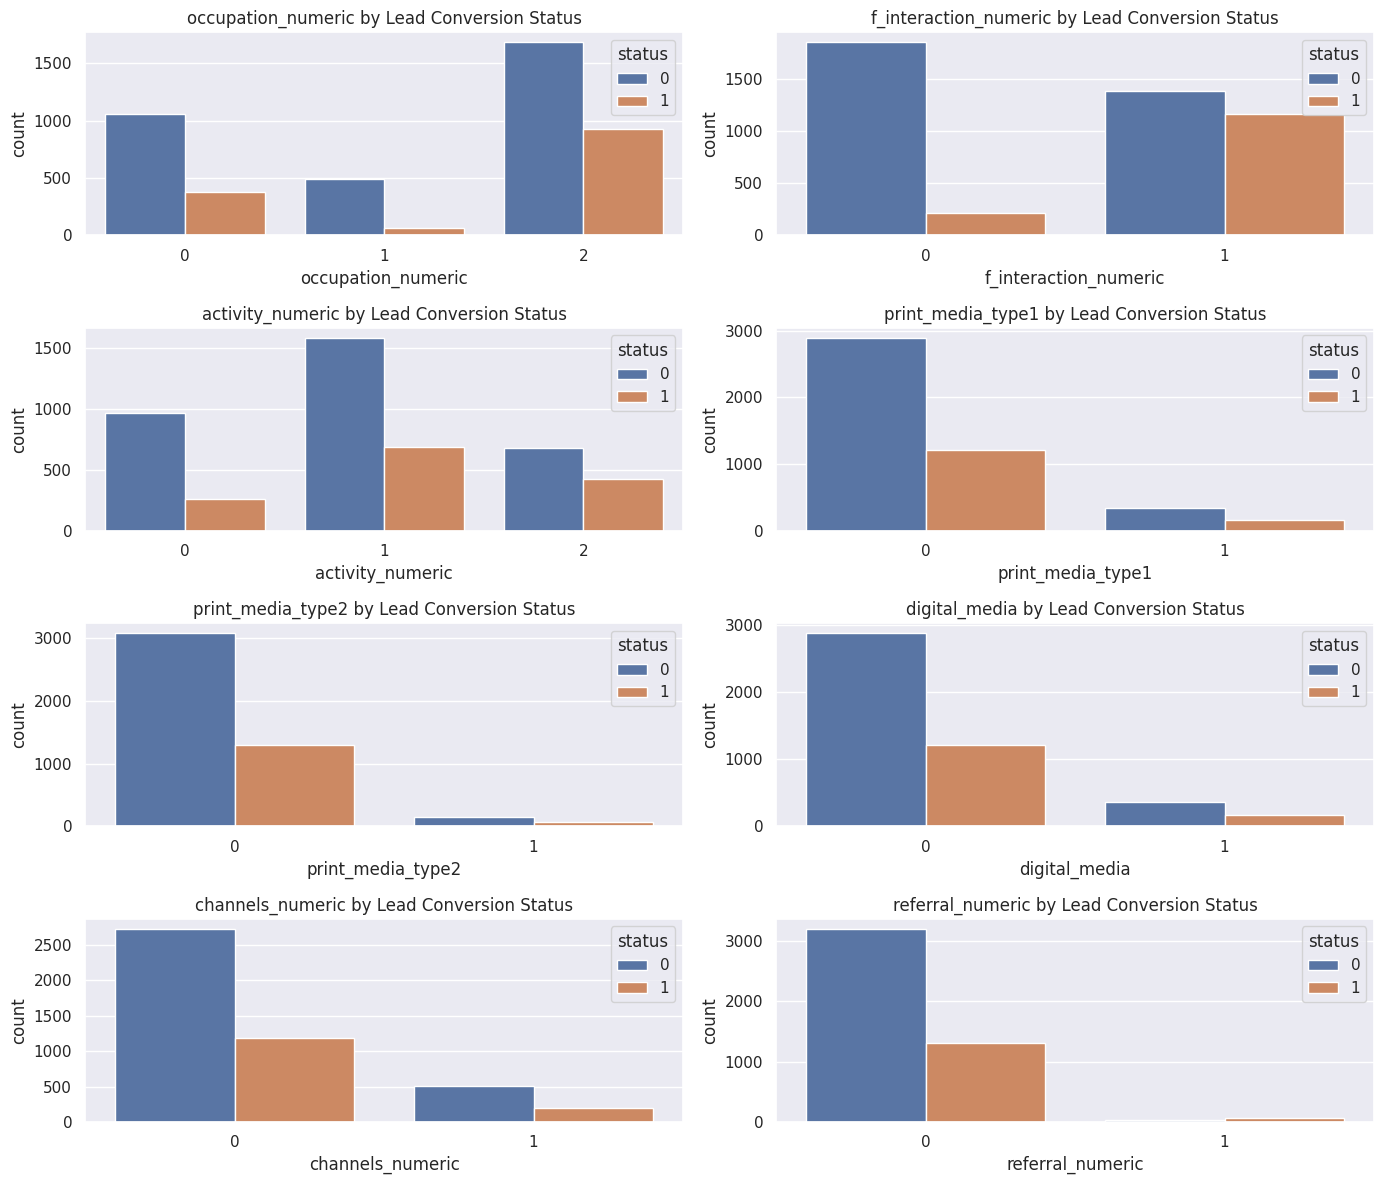

In [98]:
# List of categorical features to plot (you may want to check if there are more or fewer features in the list)
categorical_features = ['occupation_numeric', 'f_interaction_numeric',
                        'activity_numeric', 'print_media_type1', 'print_media_type2',
                        'digital_media', 'channels_numeric', 'referral_numeric']
# Set the figure size for the plots
plt.figure(figsize=(14, 12))

# Create subplots for each categorical feature
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)  # Adjusted to 4 rows and 2 columns for 7 features
    sns.countplot(data=df, x=feature, hue='status')
    plt.title(f'{feature} by Lead Conversion Status')

plt.tight_layout()
plt.show()


##### Interpretation

1. Occupation Numeric:
   - Converted leads (status: 1) are predominantly from the "Professional" category (status: 1), while non-converted leads are more diverse across all occupation categories.

2. Activity Numeric:
   - Converted leads (status = 1) are concentrated in activity = 1 (indicating high activity), whereas non-converted leads are mainly in activity = 0 (indicating low engagement).

3. F Interaction Numeric:
   - Interaction (whether it was through email, phone, or website) shows a stronger count for non-converted leads (status = 0) in interaction type = 0, while converted leads are slightly more engaged in interaction type = 1.

4. Print Media Type1:
   - Most leads (both converted and non-converted) have not been exposed to print media type 1 (status = 0), with only a small proportion of converted leads being exposed.

5. Print Media Type2:
   - Similar to print media type1, most leads have not been exposed to print media type 2 (status = 0), with minimal exposure for converted leads (status = 1).

6. Digital Media:
   - Non-converted leads (status = 0) are predominantly not exposed to digital media, whereas converted leads show some engagement with digital media (status = 1).

7. Channels Numeric:
   - The majority of both converted and non-converted leads are not influenced by channels (status = 0), with only a small proportion of converted leads being influenced by channels (status = 1).

8. Referral Numeric:
   - Converted leads (status = 1) show a significant portion of engagement through referrals (status = 1), whereas non-converted leads have a much higher count in the non-referred category.

- Lead conversion is more likely among professionals and those with higher engagement (active participation).
- Exposure to print media seems less influential, with minimal differences between converted and non-converted leads.
- Digital media exposure and referrals appear to play a more significant role in lead conversion, so these channels may be more effective for converting leads into customers.
- High activity and engagement with the company (either through channels or interaction types) are strongly correlated with conversions.


#### Additional Feature Engineering

Based on the plots above, I will process the data further to make sure only highly relevant factors are considered in model for pediction of conversion

In [99]:
# Consolidating student and unemployed into a single category
df['occupation_numeric'] = df['occupation_numeric'].replace({1: 0})


In [100]:
# Dropping less significant features
df = df.drop(columns=['print_media_type1', 'print_media_type2'])


In [101]:
# Converting categorical features into binary (0/1) if they are not already
df['digital_media'] = df['digital_media'].apply(lambda x: 1 if x > 0 else 0)
df['referral_numeric'] = df['referral_numeric'].apply(lambda x: 1 if x > 0 else 0)


In [102]:
# Converting activity_numeric to a binary feature for high vs low activity
df['high_activity'] = df['activity_numeric'].apply(lambda x: 1 if x == 1 else 0)

In [103]:
# Converting profile completion into categorical levels
df['profile_completion'] = pd.cut(df['profile_completed_numeric'], bins=[-1, 0.5, 1.5, 2], labels=['Low', 'Medium', 'High'])

In [104]:
#Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = ['time_spent_on_website', 'website_visits', 'page_views_per_visit']
df[scaled_features] = scaler.fit_transform(df[scaled_features])


In [105]:
df['engagement_score'] = df['website_visits'] * df['time_spent_on_website']


##### Correlation Matrixa

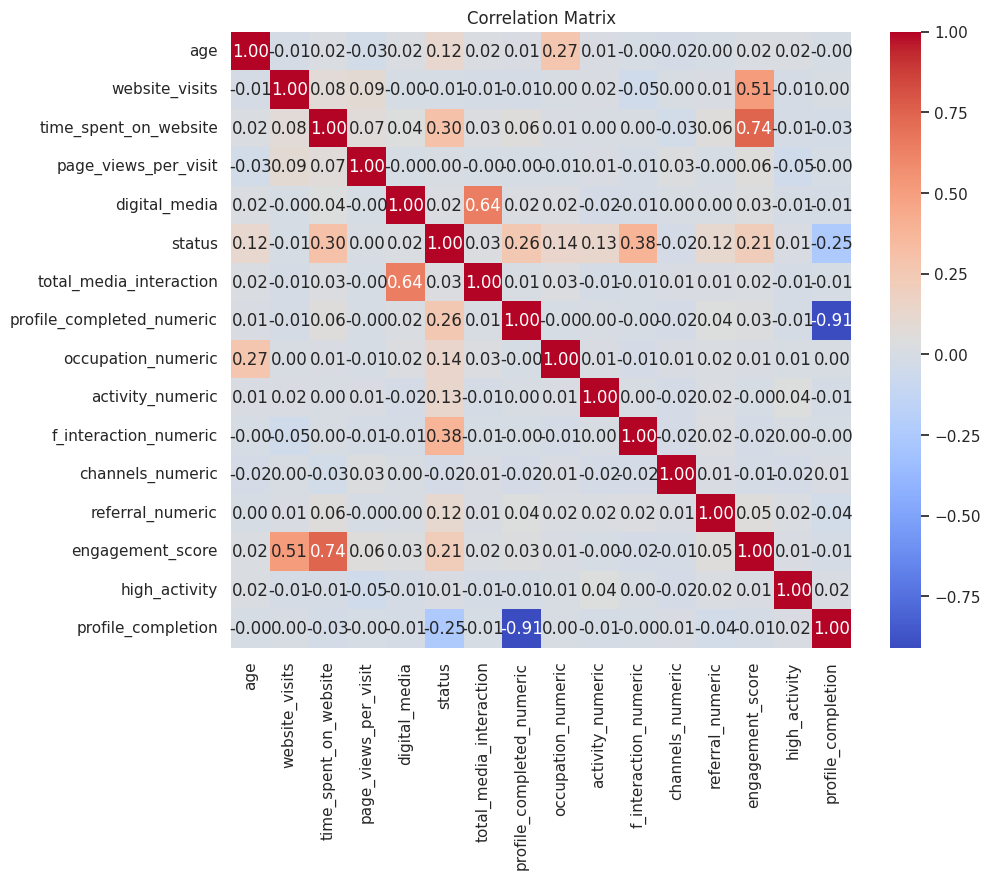

In [107]:
from sklearn.preprocessing import LabelEncoder

# Encoding the 'profile_completion' column
label_encoder = LabelEncoder()
df['profile_completion'] = label_encoder.fit_transform(df['profile_completion'])

# Now compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [63]:
df.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,status,total_media_interaction,profile_completed_numeric,occupation_numeric,activity_numeric,f_interaction_numeric,channels_numeric,referral_numeric,engagement_score
0,57,7.0,1639,1.861,1,0,1,1,2,2,0,2,1,0,0,11473.0
1,56,2.0,83,0.320,0,0,0,0,0,1,2,2,0,1,0,166.0
2,52,3.0,330,0.074,0,0,1,0,1,1,2,2,1,0,0,990.0
3,53,4.0,464,2.057,0,0,0,1,0,2,0,2,1,0,0,1856.0
4,23,4.0,600,6.274,0,0,0,0,0,2,1,1,1,0,0,2400.0


### Data Split for Training and Testing Purpose

##### Balancing the converted vs not converted in status to make it balanced for the model to perform accurately

In [108]:
# I am undersampling the Not Converted to balance the converted and the not converted
from imblearn.under_sampling import RandomUnderSampler

# Initializing the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Applying the under-sampling technique
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Checking the new distribution
print(pd.Series(y_resampled).value_counts())


status
0    1377
1    1377
Name: count, dtype: int64


I am splitting the data into training and testing sets (80% training, 20% testing)

In [109]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)



## Random Tree Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Training the model
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [114]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Making predictions
y_pred = rf.predict(X_test)

# Evaluating model performance
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred)}")


              precision    recall  f1-score   support

           0       0.81      0.86      0.83       276
           1       0.85      0.80      0.82       275

    accuracy                           0.83       551
   macro avg       0.83      0.83      0.83       551
weighted avg       0.83      0.83      0.83       551

ROC-AUC: 0.827536231884058


The model shows good performance with an overall accuracy of 83%, correctly classifying leads as converted or non-converted. The precision for class 1 (converted leads) is 0.85, indicating that most of the predicted converted leads are indeed converted, while the recall for class 1 is 0.80, meaning it captures 80% of the actual converted leads. The ROC-AUC score of 0.83 suggests that the model has a strong ability to discriminate between converted and non-converted leads, with a good trade-off between sensitivity and specificity.

In [115]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


[[236  40]
 [ 55 220]]


The confusion matrix shows that the model correctly predicted 236 non-converted leads (true negatives) and 220 converted leads (true positives). However, it misclassified 40 non-converted leads as converted (false positives) and 55 converted leads as non-converted (false negatives). Overall, the model is performing well, but there's room for improvement in reducing the number of false positives and false negatives to increase precision and recall. I will be using two different algorithms to see which would perform better in predictions after I am finished with the random classifier completely.

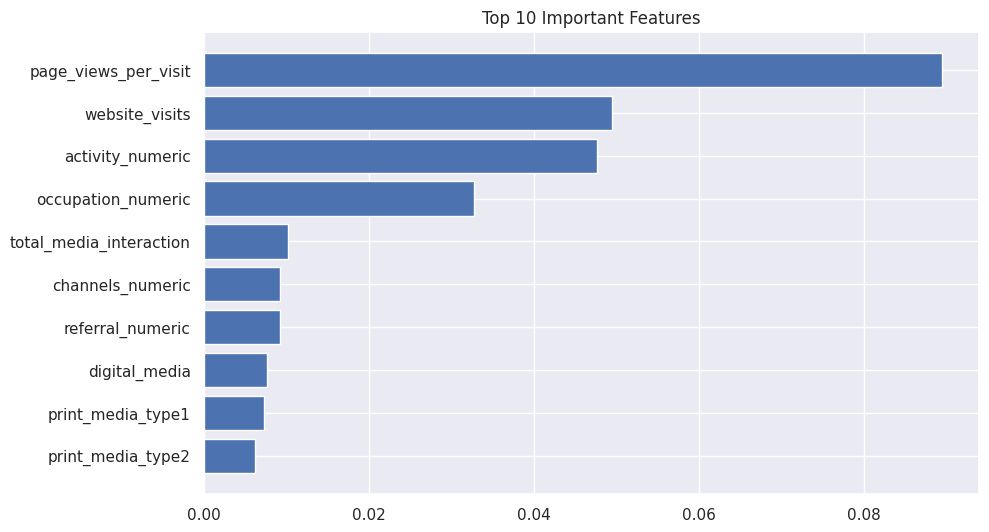

In [120]:
# Feature Importance (for Random Forest)
feature_importances = rf.feature_importances_
sorted_idx = feature_importances.argsort()

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx][:10], feature_importances[sorted_idx][:10])
plt.title("Top 10 Important Features")
plt.show()


Some findings in the above given plot are:
- Page views per visit and website visits are the most important predictors of lead conversion, suggesting that increased website engagement correlates with higher conversion likelihood.
- Activity level and occupation (professionals) are also significant, with higher activity and professional leads more likely to convert.
Digital media and referrals contribute strongly to conversions, while print media has minimal impact.

Website engagement, referrals, and occupation are the key factors driving lead conversion.

## Building a Decision Tree model

In [122]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize the Decision Tree with hyperparameters
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, criterion='gini')

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Evaluate the model's accuracy on the test set
dt_accuracy = dt_model.score(X_test, y_test)
print(f"Decision Tree Model Accuracy: {dt_accuracy:.4f}")



Decision Tree Model Accuracy: 0.8330


Here, the Decision Tree model has an accuracy of 83.30%, it correctly predicted whether a lead was converted or not for 83.30% of the test data.

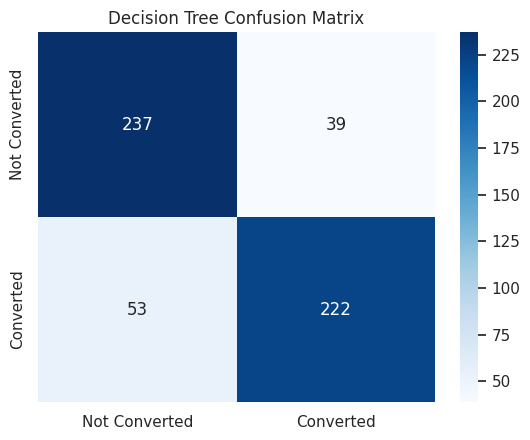

In [123]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions from the model
y_pred_dt = dt_model.predict(X_test)

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.title('Decision Tree Confusion Matrix')
plt.show()


237 of the test data were correctly classified as "Not Converted."

39 of the test data points were incorrectly predicted as "Converted."

53 of the test data points were incorrectly predicted as "Not Converted."

222 of the test data were correctly classified as "Converted."

In [124]:
from sklearn.metrics import classification_report

# Print the classification report for detailed performance metrics
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       276
           1       0.85      0.81      0.83       275

    accuracy                           0.83       551
   macro avg       0.83      0.83      0.83       551
weighted avg       0.83      0.83      0.83       551



As we can see from the report above, precision and recall are more or less balanced in this case, so we do not have to process it further to increase/decrease either, because decreasing one will most likely increase another.

In [125]:
from sklearn.metrics import roc_auc_score

dt_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
print(f"Decision Tree ROC AUC Score: {dt_auc:.4f}")


Decision Tree ROC AUC Score: 0.9164


ROC AUC Score gives the measure of how well the model distinguishes between the two classes (converted vs. not converted).
A score of 0.9164 means the model is good at distinguishing the two classes.

## Do we need to prune the tree?

No, we do not need to prune the tree as the model is not overfitting and the accuracy and ROC AUC scores are good enough based on the decision tree given above.

## Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

# Train Logistic Regression
lr_model.fit(X_train, y_train)

print("Logistic Regression Accuracy: ", lr_model.score(X_test, y_test))


Logistic Regression Accuracy:  0.6950998185117967


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the Logistic Regression model
lr_model = LogisticRegression(max_iter=500, random_state=42)

# Fitting the scaled data
lr_model.fit(X_train_scaled, y_train)

# Evaluating the model
print(f"Logistic Regression Accuracy: {lr_model.score(X_test_scaled, y_test)}")


Logistic Regression Accuracy: 0.7931034482758621


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

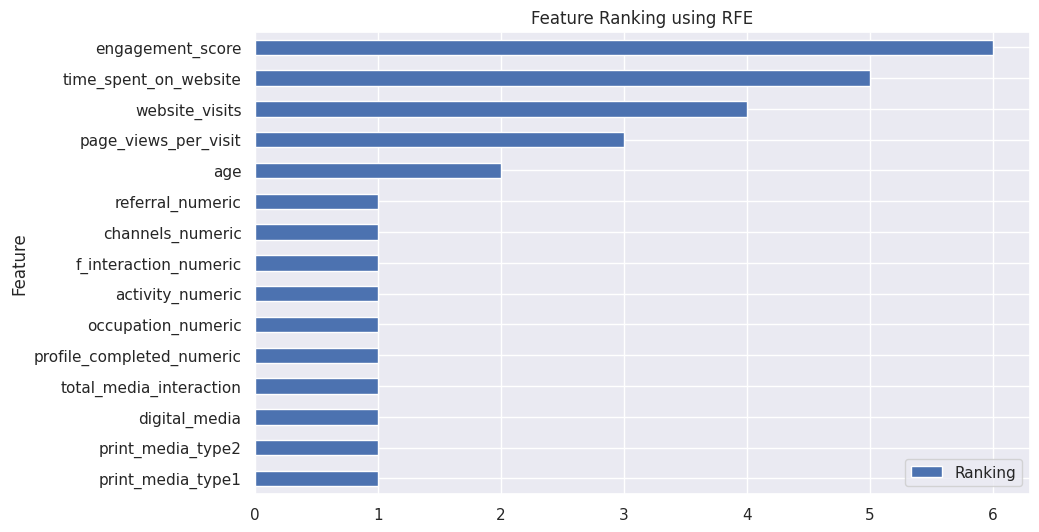

In [128]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Initialize RFE with the model
selector = RFE(model, n_features_to_select=10)

# Fit RFE to the data
selector.fit(X_train, y_train)

# Get the ranking of features
selected_features = X.columns[selector.support_]
selected_features

# Plot the feature ranking
ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': selector.ranking_
}).sort_values(by='Ranking', ascending=True)

ranking.plot(kind='barh', x='Feature', y='Ranking', title="Feature Ranking using RFE", figsize=(10, 6))
plt.show()


As seen above, the RFE plot ranks engagement_score, time_spent_on_website, and website_visits as the most important features, followed by page_views_per_visit and age. The Random Forest results align with this ranking, highlighting the significance of website engagement in predicting lead conversion. Both models show that referrals and age are less important than engagement metrics. Print media features rank low in both models, indicating their minimal impact on conversion.

Lead conversion is strongly influenced by engagement-related features such as website visits, time spent on the website, and page views per visit, while referral and other variables are less important.

Further tests for the model performance in logistic regression:

In [129]:
from sklearn.metrics import classification_report, roc_auc_score

# Get predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])
print(f"Logistic Regression ROC AUC Score: {roc_auc:.4f}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       276
           1       0.80      0.77      0.79       275

    accuracy                           0.79       551
   macro avg       0.79      0.79      0.79       551
weighted avg       0.79      0.79      0.79       551

Logistic Regression ROC AUC Score: 0.8542


Here too we see a balance between Precision and Recall, and a good accuracy score and a good ROC AUC score. Therefore, I am not changing any aspect of the training data and method further.

## Do we need to prune the tree?

We do not need to prune the tree as it is not overfitting.

## Actionable Insights and Recommendations

Based on the findings, actionable recommendations are:
- Focus marketing efforts on professionals, highly engaged leads, and those who have interacted with the company through digital media and referrals.
- Utilize digital media channels and referrals to increase lead conversion.
- Allocate more resources to high-activity leads, as they are more likely to convert.